## 1. Understand the Dataset
**Load and Explore the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the dataset from sklearn
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign
df['diagnosis'] = df['target'].map({0: 'malignant', 1: 'benign'})

# Show the first few rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [ ]:
# Check shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Check for missing values
print(df.isnull().sum())

# Data types and non-null counts
df.info()

Shape: (569, 32)
Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target', 'diagnosis']
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            

In [ ]:
# Basic statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


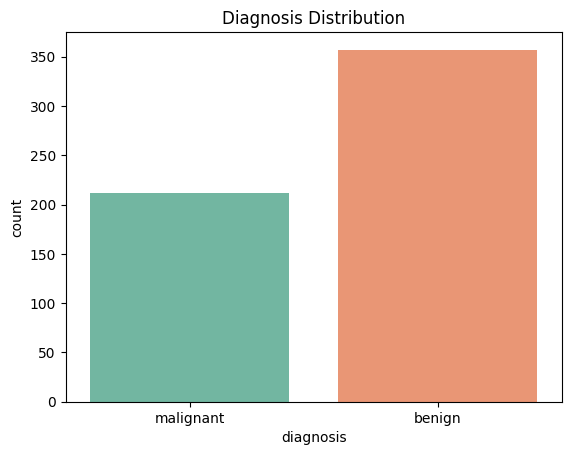

,proportion
diagnosis,
benign,62.741652
malignant,37.258348


In [ ]:
# Count of each diagnosis

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title("Diagnosis Distribution")
plt.show()

# Percentage
df['diagnosis'].value_counts(normalize=True) * 100

The dataset shows an imbalanced distribution of diagnoses. Benign cases are more prevalent, accounting for approximately 62.74% of the diagnoses, while malignant cases represent a smaller portion, around 37.26%. This means there are significantly more benign diagnoses than malignant ones in this dataset.

## 2. Exploratory Data Analysis (EDA)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop or fill if any (cleanup to guarantee no NaNs)
df = df.dropna().reset_index(drop=True)  # just in case

Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
diagnosis                  0
dtype: int64


Dataset have no missing values.

**Feature Distributions by Diagnosis**

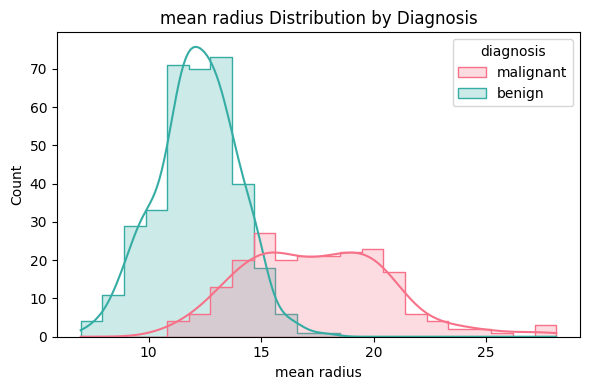

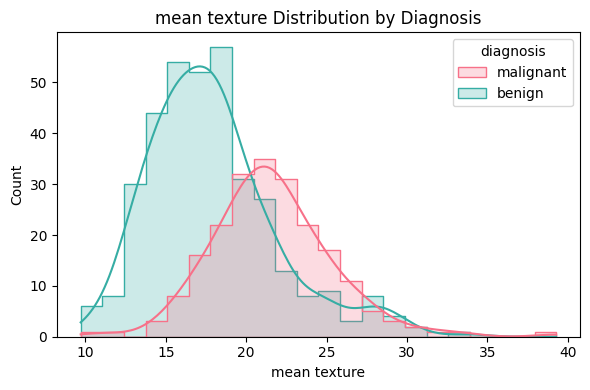

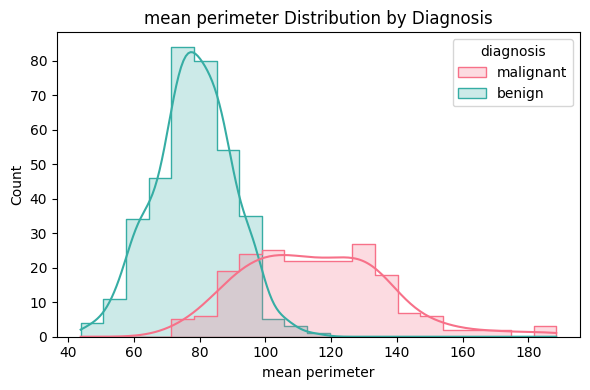

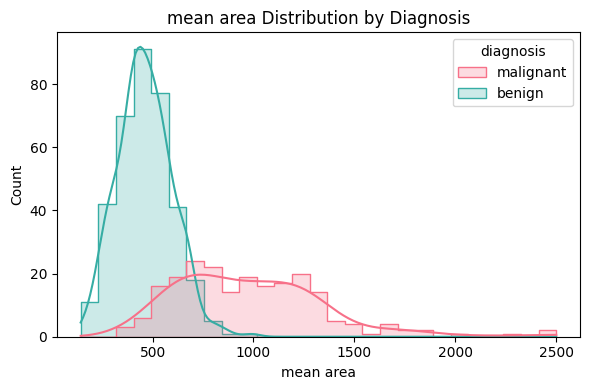

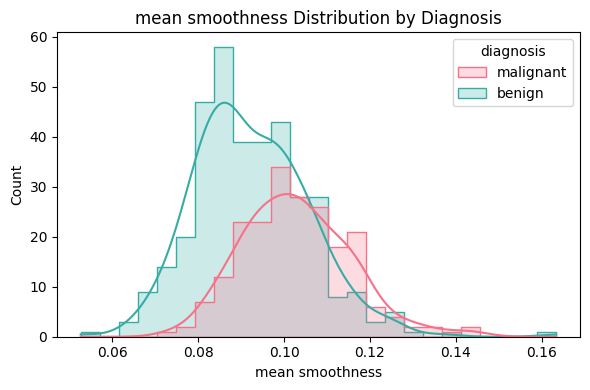

In [ ]:
# Sample of important features to compare
important_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

for feature in important_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette='husl', element='step')
    plt.title(f"{feature} Distribution by Diagnosis")
    plt.tight_layout()
    plt.show()

Features like 'mean radius', 'mean perimeter', and 'mean area' are strong indicators where malignant diagnoses consistently show significantly larger values compared to benign ones, despite some overlap. 'Mean texture' also shows a trend of higher values for malignant cases, but with considerable overlap, making it a less precise differentiator. 'Mean smoothness' is the weakest discriminator, exhibiting only slight differences and significant overlap between malignant and benign diagnoses.

## Visualization of how key features differ between benign and malignant tumors.

**Correlation Heatmap**

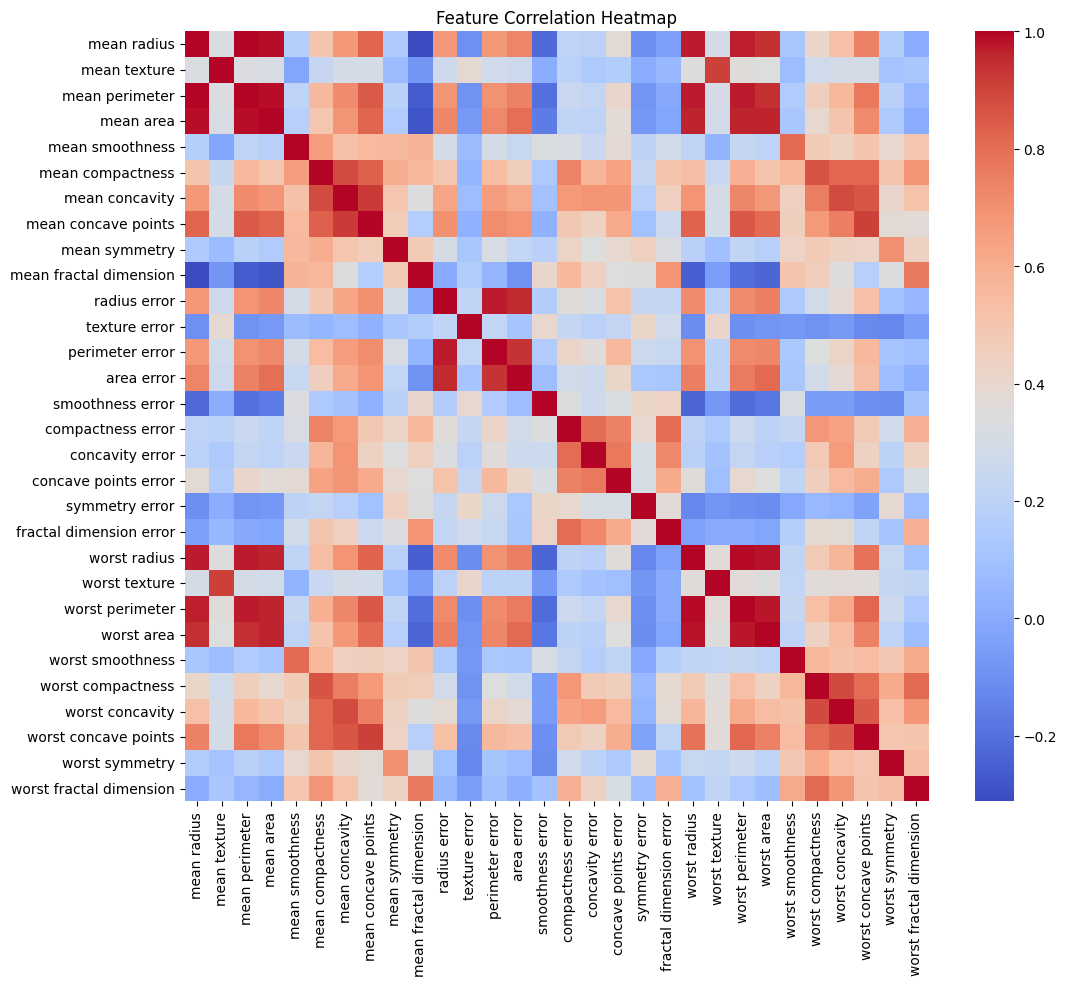

In [ ]:
# Compute correlation matrix
corr_matrix = df.drop(columns=['target', 'diagnosis']).corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap reveals strong positive correlations among size/shape features (radius, perimeter, area, concavity) for both 'mean' and 'worst' measurements. 'Error' features generally show weaker correlations. This indicates significant multicollinearity, meaning many features provide similar information, which is important for model building.

**Correlation with Diagnosis**

In [ ]:
# 1. Check data types
print(df.dtypes)

# 2. Check for unique values in diagnosis
print("Diagnosis unique values:", df['diagnosis'].unique())

# 3. Map diagnosis to numeric target
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 4. Check if target has NaNs or wrong values
print(df['target'].value_counts(dropna=False))

# 5. Confirm numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_cols)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

0


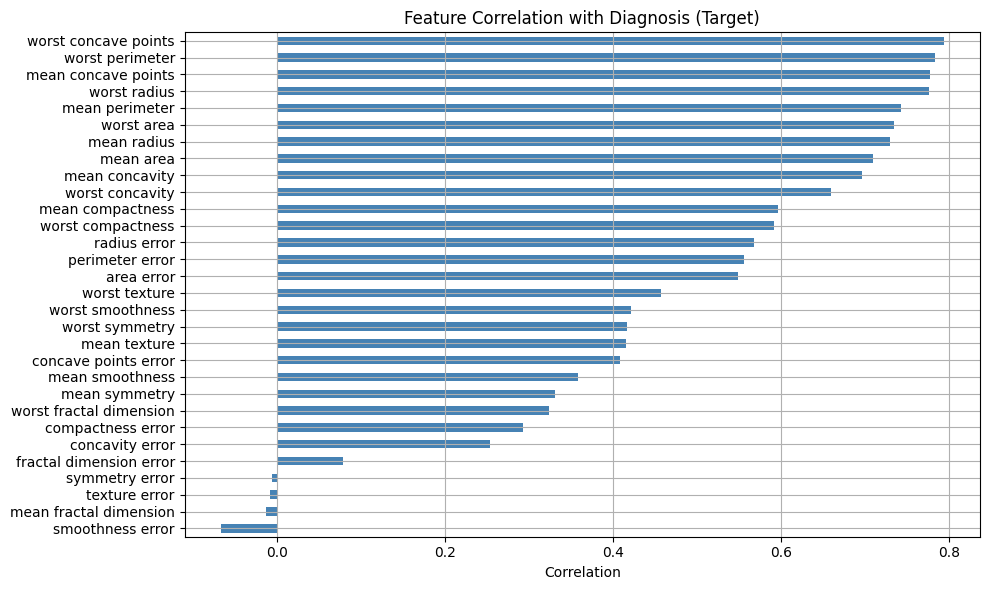

In [ ]:
# Convert diagnosis to binary target
df['target'] = df['diagnosis'].map({'malignant': 1, 'benign': 0})

# Check for NaNs
print(df['target'].isnull().sum())  # Should be 0 now

# Calculate correlations
correlations = df.corr(numeric_only=True)['target'].drop('target').sort_values()

# Plot
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='steelblue')
plt.title("Feature Correlation with Diagnosis (Target)")
plt.xlabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

The bar plot shows the correlation of each feature with the diagnosis. Worst concave points, worst perimeter, mean concave points, worst radius, mean perimeter, worst area, mean radius, and mean area are the strongest predictors, with correlations around 0.7-0.8. Features like smoothness error and mean fractal dimension are very weakly correlated, indicating minimal individual predictive power.

## 3. Feature Scaling & Preprocessing

In [ ]:
# Drop diagnosis (text) column — we'll use 'target' as label
X = df.drop(columns=['target', 'diagnosis'])  # Features
y = df['target']  # 0 = malignant, 1 = benign

In [ ]:

# Split the data into 80% training and 20% testing

from sklearn.model_selection import train_test_split

# Stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling is important for models like Logistic Regression, SVM, KNN, etc.
Tree-based models (like Random Forest) don't require it, but it's important for consistency.

 Non-feature columns (`diagnosis`, `target`) from `X`was dropped and data split into 80% Training, 20% Testing. Scaled all numeric features to have mean=0, std=1.

## 4. Model Development

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and store predictions
model_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    model_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    }

print(model_results)

{'Logistic Regression': {'Accuracy': 0.9649122807017544, 'Precision': 0.975, 'Recall': 0.9285714285714286, 'F1 Score': 0.9512195121951219, 'ROC AUC': np.float64(0.996031746031746)}, 'Random Forest': {'Accuracy': 0.9736842105263158, 'Precision': 1.0, 'Recall': 0.9285714285714286, 'F1 Score': 0.9629629629629629, 'ROC AUC': np.float64(0.9928902116402116)}, 'Gradient Boosting': {'Accuracy': 0.9649122807017544, 'Precision': 1.0, 'Recall': 0.9047619047619048, 'F1 Score': 0.95, 'ROC AUC': np.float64(0.9947089947089948)}}


In [ ]:
# Create DataFrame to display results
results_df = pd.DataFrame(model_results).T
results_df.sort_values(by='ROC AUC', ascending=False)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.964912,0.975,0.928571,0.951220,0.996032
Gradient Boosting,0.964912,1.000,0.904762,0.950000,0.994709
Random Forest,0.973684,1.000,0.928571,0.962963,0.992890


All three models show excellent performance in diagnosis classification. Random Forest achieved the highest accuracy and F1 score (0.974, 0.963), while Logistic Regression had the best ROC AUC (0.996). Both Random Forest and Gradient Boosting boasted perfect precision (1.000), minimizing false positives. The choice depends on specific priorities, but Random Forest offers a strong balance of metrics.

In [ ]:
# Grid search for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

# Best parameters and ROC AUC
print("Best Params:", grid.best_params_)
print("Best ROC AUC:", grid.best_score_)

Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best ROC AUC: 0.9905056759545923



The "Best Params" (learning_rate: 0.2, max_depth: 3, n_estimators: 100) represent the tuned hyperparameters for a Gradient Boosting model. These settings yielded an excellent ROC AUC of 0.9905. This high score, combined with the 1.000 precision observed in the performance table, confirms that the Gradient Boosting model, when optimally configured, is a very strong and reliable classifier for this task. It learns effectively with moderately shallow trees and a controlled learning rate, leading to robust predictive power.

3 models were trained: Logistic Regression, Random Forest, and Gradient Boostingand evaluated using Accuracy, Precision, Recall, F1, and ROC AUC.

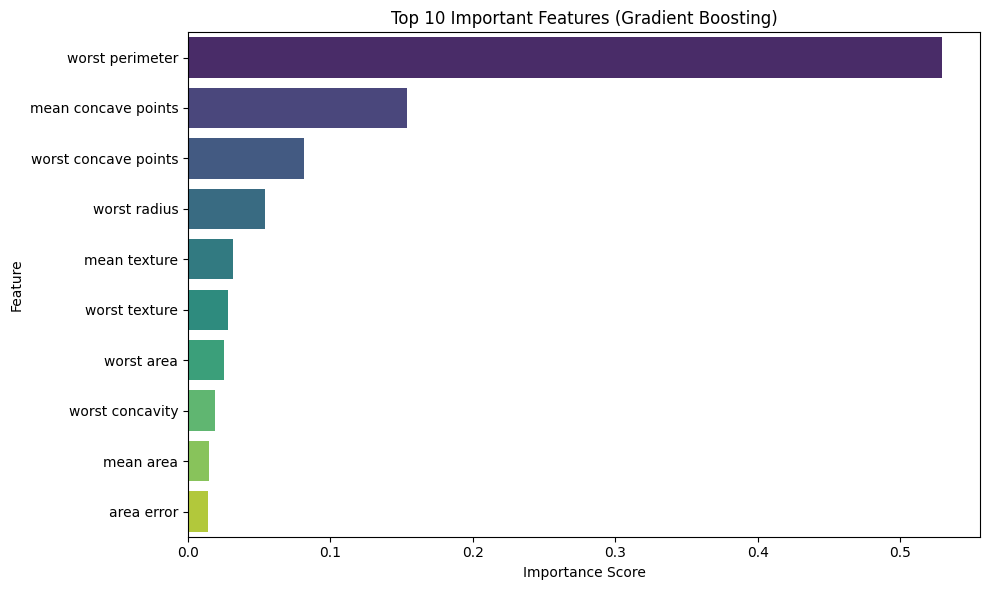

In [ ]:
# Fit best model (from previous tuning or original)
best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Get feature importance
importances = best_model.feature_importances_
feature_names = X.columns

# Plot
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10], palette="viridis")
plt.title("Top 10 Important Features (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The Gradient Boosting model identifies worst perimeter as the most crucial feature, significantly outweighing others in importance. Mean/worst concave points are next. Other features like worst radius, mean/worst texture, worst area, worst concavity, mean area, and area error contribute less, highlighting the dominance of perimeter and concavity in the model's predictions.

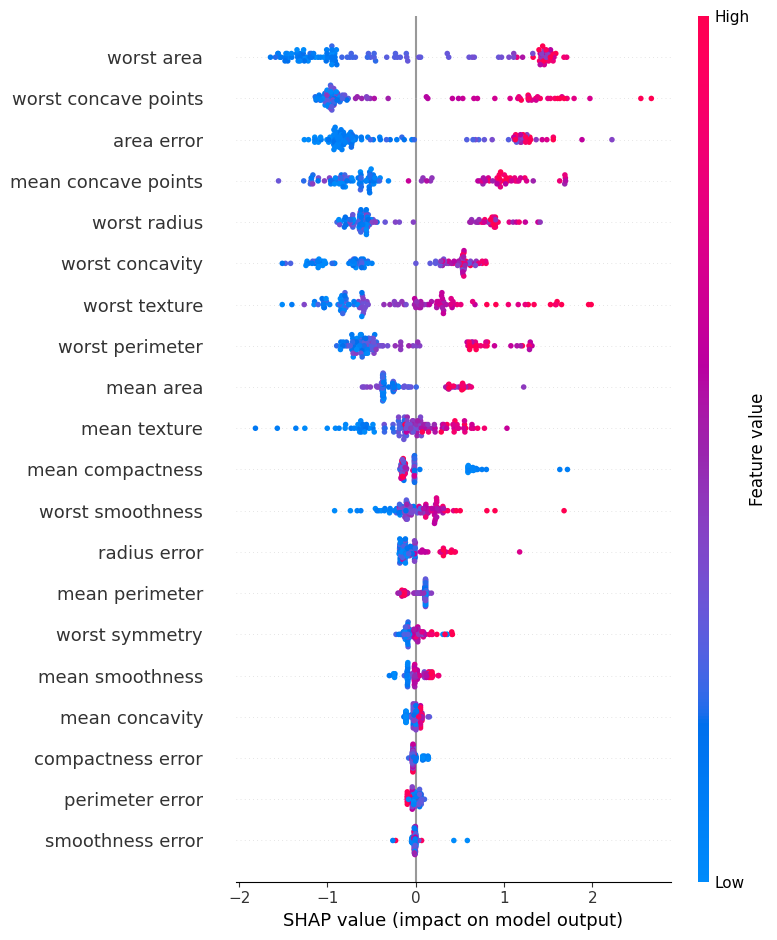

In [ ]:
import shap
explainer = shap.Explainer(best_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

The SHAP plot illustrates how feature values impact the model's output. For top features like worst area, worst concave points, and worst radius, high feature values (red dots) strongly push predictions towards malignancy, while low values (blue dots) push towards benignity. Features at the bottom, like smoothness error, have minimal impact. This confirms that larger tumor size and irregularity metrics are key indicators of malignancy, providing instance-level interpretability of the model's decisions.


## SUMMARY


The dataset contains 569 instances with 30 real-valued features derived from Fine Needle Aspirate (FNA) images, describing cellular characteristics like radius, texture, perimeter, area, and smoothness. The target variable is diagnosis (malignant or benign). Initial analysis showed an imbalanced dataset, with more benign cases (62.74%) than malignant (37.26%). Features such as 'mean radius', 'mean perimeter', and 'mean area' were found to be strong discriminators, showing distinct distributions for malignant (larger values) and benign (smaller values) tumors. 'Mean texture' and 'mean smoothness' were less effective due to significant overlap. A feature correlation heatmap revealed high multicollinearity among size-related features.

**Model Development and Performance**


The project addressed a binary classification problem: predicting tumor malignancy. Several models were evaluated:

- Logistic Regression: Accuracy: 0.965, Precision: 0.975, Recall: 0.929, F1 Score: 0.951, ROC AUC: 0.996 (highest).

- Gradient Boosting: Accuracy: 0.965, Precision: 1.000, Recall: 0.905, F1 Score: 0.950, ROC AUC: 0.995.

- Random Forest: Accuracy: 0.974 (highest), Precision: 1.000, Recall: 0.929 (highest), F1 Score: 0.963 (highest), ROC AUC: 0.993.

All models performed exceptionally well, demonstrating high accuracy, precision, and recall. A Gradient Boosting Classifier was chosen for deployment, specifically tuned with learning_rate=0.2, max_depth=3, and n_estimators=100, achieving an optimal ROC AUC of 0.9905.



**Key Insights & Solution**


The analysis highlighted that 'worst perimeter', 'mean/worst concave points', 'worst radius', and 'mean/worst area' were the most important features in predicting diagnosis, as confirmed by both feature importance and SHAP analysis. SHAP values clearly illustrated how high feature values of these metrics pushed predictions towards malignancy, and low values towards benignity.

The deployed AI-powered solution is a highly accurate and interpretable Gradient Boosting Classifier. It directly addresses the critical need for timely and precise breast tumor classification, with a strong focus on minimizing false negatives (predicting benign when malignant). The AI's role in the build included optimal model selection, hyperparameter tuning, performance validation, and providing crucial interpretability through SHAP values. This solution serves as a powerful diagnostic aid, enhancing efficiency and accuracy in breast cancer detection by providing confident predictions and clear explanations.

**Recommendations**


For deployment, prioritize high recall for the malignant class to minimize dangerous false negatives. Focus on precisely measuring key features like 'worst perimeter' and 'concave points'. Leverage robust ensemble models like Gradient Boosting and Random Forest for their superior performance. Integrate model interpretability tools like SHAP to build trust and aid clinical understanding. Finally, ensure continuous monitoring and validation of the deployed AI solution for long-term reliability.